In [1]:
## Monolayer Graphene

import numpy as np
from scipy import special
from scipy import integrate

def coulomb_potential(q):
    return 1  # 2 * np.pi / q  ## in units of (e^2 / k*l_0)

## Form Factor
def form_factor_0(q): ## for n = 0 Landau Level
    return special.eval_laguerre(0, q**2 / 2)

def form_factor_n(n, q): ## for nth Landau Level
    return (special.eval_laguerre(n, q**2 / 2) + special.eval_laguerre(n-1, q**2 / 2)) * 0.5

## Integrand
def integrand_0(q, m): ## for n = 0 Landau Level
    laguerre = special.eval_laguerre(m, q**2)
    form_f_0 = form_factor_0(q)
    return  coulomb_potential(q) * (form_f_0)**2 * laguerre * np.exp(-q**2)

def integrand_n(q, m, n): ## for nth Landau Level
    laguerre = special.eval_laguerre(m, q**2)
    form_f_n = form_factor_n(n , q)
    return  coulomb_potential(q) * (form_f_n)**2 * laguerre * np.exp(-q**2)

## Pseudopotential 
def calculate_pseudopotential_0(m):
    result_0, _ = integrate.quad(integrand_0, 0, np.inf, args=(m,))
    return result_0

def calculate_pseudopotential_n(n,m):
    result_n, _ = integrate.quad(integrand_n, 0, np.inf, args=(m,n))
    return result_n

# Calculate pseudopotentials for m = 0 to 5 and n=0 Landau Level
m_values = range(6)
pseudopotentials_0 = [calculate_pseudopotential_0(m) for m in m_values]

# Print results
print("For n = 0 Landau Level, The pseudopotentials V_m are as follows: ")
for m, V_m in zip(m_values, pseudopotentials_0):
    print(f"V_{m}_{0} = {V_m:.6f}")

# Calculate pseudopotentials for m = 0 to 5 and n=0 Landau Level
m_values = range(6)
n_values = np.array([1,2])

print("For nth Landau Level, The pseudopotentials V_m are as follows: ")
for n in n_values:
    for m in m_values:
        pseudopotentials_n = calculate_pseudopotential_n(n,m)
        print(f"V_{m}_{n} = {pseudopotentials_n:.6f}")

For n = 0 Landau Level, The pseudopotentials V_m are as follows: 
V_0_0 = 0.886227
V_1_0 = 0.443113
V_2_0 = 0.332335
V_3_0 = 0.276946
V_4_0 = 0.242328
V_5_0 = 0.218095
For nth Landau Level, The pseudopotentials V_m are as follows: 
V_0_1 = 0.706212
V_1_1 = 0.491579
V_2_1 = 0.375608
V_3_1 = 0.293390
V_4_1 = 0.251956
V_5_1 = 0.224640
V_0_2 = 0.545454
V_1_2 = 0.399949
V_2_2 = 0.394080
V_3_2 = 0.346034
V_4_2 = 0.291299
V_5_2 = 0.244071


In [2]:
## GaAs

def form_factor_GaAs(n, q):
    return special.eval_laguerre(n, q**2 / 2)

def integrand_GaAs(q, m, n):
    laguerre = special.eval_laguerre(m, q**2)
    form_f_GaAs = form_factor_GaAs(n, q)
    return  coulomb_potential(q) * form_f_GaAs**2 * laguerre * np.exp(-q**2)

def calculate_pseudopotential_GaAs(n,m):
    result, _ = integrate.quad(integrand_GaAs, 0, np.inf, args=(n,m))
    return result

# Calculate pseudopotentials for m = 0 to 5 and n=0 Landau Level
m_values = range(6)
n_values = np.array([0,1,2])

print("For nth Landau Level, The pseudopotentials V_m are as follows: ")
for n in n_values:
    for m in m_values:
        pseudopotentials_GaAs = calculate_pseudopotential_GaAs(n,m)
        print(f"V_{m}_{n} = {pseudopotentials_GaAs:.6f}")

For nth Landau Level, The pseudopotentials V_m are as follows: 
V_0_0 = 0.886227
V_1_0 = 0.609281
V_2_0 = 0.506292
V_3_0 = 0.447170
V_4_0 = 0.407158
V_5_0 = 0.377579
V_0_1 = 0.443113
V_1_1 = 0.415419
V_2_1 = 0.360462
V_3_1 = 0.325168
V_4_1 = 0.300089
V_5_1 = 0.281002
V_0_2 = 0.332335
V_1_2 = 0.450037
V_2_2 = 0.373336
V_3_2 = 0.332558
V_4_2 = 0.305091
V_5_2 = 0.284700


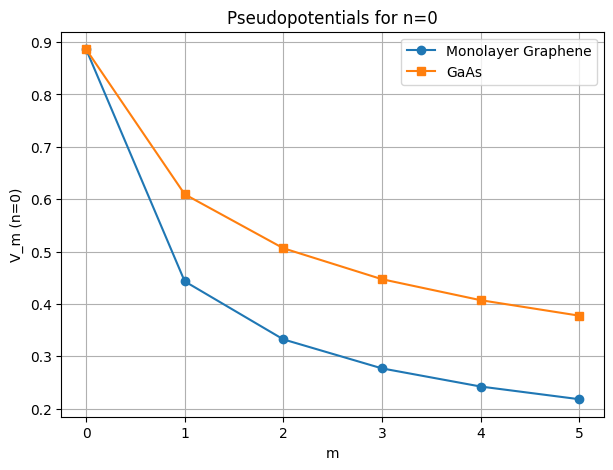

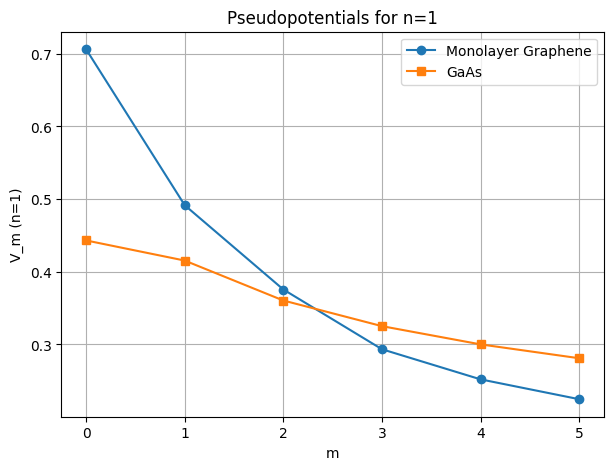

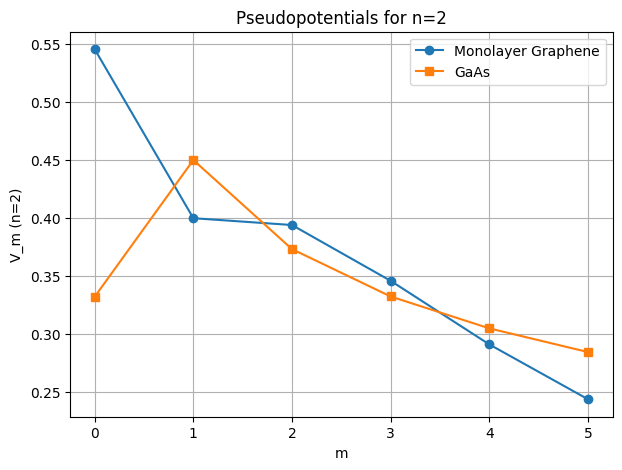

In [3]:
import matplotlib.pyplot as plt
# Given m values
m_values = np.arange(6)

# Placeholder pseudopotentials (Replace with actual values from notebook execution)
pseudopotentials_MG = {
    0: [0.886227, 0.443113, 0.332335, 0.276946, 0.242328, 0.218095],  # n=0 for MG
    1: [0.706212, 0.491579, 0.375608, 0.293390, 0.251956, 0.224640],  # n=1 for MG
    2: [0.545454, 0.399949, 0.394080, 0.346034, 0.291299, 0.244071]  # n=2 for MG
}

pseudopotentials_GaAs = {
    0: [0.886227, 0.609281, 0.506292, 0.447170, 0.407158, 0.377579],  # n=0 for GaAs
    1: [0.443113, 0.415419, 0.360462, 0.325168, 0.300089, 0.281002],  # n=1 for GaAs
    2: [0.332335, 0.450037, 0.373336, 0.332558, 0.305091, 0.284700]  # n=2 for GaAs
}

# Plot pseudopotentials for each Landau level
for n in range(3):
    plt.figure(figsize=(7,5))
    plt.plot(m_values, pseudopotentials_MG[n], 'o-', label='Monolayer Graphene')
    plt.plot(m_values, pseudopotentials_GaAs[n], 's-', label='GaAs')
    plt.xlabel('m')
    plt.ylabel(f'V_m (n={n})')
    plt.title(f'Pseudopotentials for n={n}')
    plt.legend()
    plt.grid()
    plt.show()